In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df = pd.read_csv('train.csv', thousands = '.')
df = pd.read_csv('train.csv')
df

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [3]:
print(df[df['일시'] == 20190907])

           일시  광진구  동대문구  성동구  중랑구
614  20190907  0.0   0.0  0.0  0.0


In [4]:
print(df[df['일시'] == 20190906])
print(df[df['일시'] == 20190908])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
           일시   광진구   동대문구    성동구    중랑구
615  20190908  5.83  2.658  4.188  2.482


In [5]:
df.loc[614] = [20190907, 3.93, 2.027, 2.846, 1.753]
print(df[613:616])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
614  20190907  3.93  2.027  2.846  1.753
615  20190908  5.83  2.658  4.188  2.482


In [6]:
df1 = pd.read_csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv', encoding='cp949', thousands = ',')
df2 = pd.read_csv('서울특별시 공공자전거 일별 대여건수(2019.4_5).csv', thousands = ',')
df3 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_20190601_20191130.csv', thousands = ',')
df4 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.csv', thousands = ',')
df5 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.06.01_2020.06.30.csv', thousands = ',')
df6 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.csv', encoding='cp949', thousands = ',')
df7 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.02.01_21.06.30.csv', encoding='cp949', thousands = ',')
df8 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.07-21.12.csv', encoding='cp949', thousands = ',')
df3

,대여일시,대여건수
0,2019-06-01,79878
1,2019-06-02,77091
2,2019-06-03,82911
3,2019-06-04,83576
4,2019-06-05,81515
...,...,...
177,2019-11-26,52464
178,2019-11-27,46248
179,2019-11-28,46983
180,2019-11-29,44689


In [7]:
print(df3[df3['대여일시'] == '2019-09-06'])
print(df3[df3['대여일시'] == '2019-09-08'])

          대여일시   대여건수
97  2019-09-06  16631
          대여일시   대여건수
98  2019-09-08  52055


In [8]:
typhoon = pd.DataFrame([['2019-09-07',34343]],columns=df3.columns)
df3 = pd.concat([df3.iloc[:98], typhoon, df3.iloc[98:]], ignore_index = True)
print(df3[97:100])

          대여일시   대여건수
97  2019-09-06  16631
98  2019-09-07  34343
99  2019-09-08  52055


In [9]:
in_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
in_df = in_df.drop(['대여일자','대여일시'],axis=1)
in_df.reset_index(inplace=True,drop=True)

In [10]:
print(df.info())
print(in_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대여건수    1461 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None


In [11]:
df = pd.concat([df,in_df],axis=1)
df

,일시,광진구,동대문구,성동구,중랑구,대여건수
0,20180101,0.592,0.368,0.580,0.162,4950
1,20180102,0.840,0.614,1.034,0.260,7136
2,20180103,0.828,0.576,0.952,0.288,7156
3,20180104,0.792,0.542,0.914,0.292,7102
4,20180105,0.818,0.602,0.994,0.308,7705
...,...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350,42521
1457,20211228,4.510,3.890,3.714,2.700,51268
1458,20211229,4.490,3.524,3.660,2.524,52017
1459,20211230,4.444,3.574,3.530,2.506,48993


In [12]:
to_int = ['광진구','동대문구','성동구','중랑구']
for i in to_int:
    df[i] = df[i]*1000
    df = df.astype({i: 'int'})
df

,일시,광진구,동대문구,성동구,중랑구,대여건수
0,20180101,592,368,580,162,4950
1,20180102,840,614,1034,260,7136
2,20180103,828,576,952,288,7156
3,20180104,792,542,914,292,7102
4,20180105,818,602,994,308,7705
...,...,...,...,...,...,...
1456,20211227,3830,3416,2908,2350,42521
1457,20211228,4510,3890,3714,2700,51268
1458,20211229,4490,3524,3660,2524,52017
1459,20211230,4444,3574,3530,2506,48993


In [13]:
df.columns = ['date','Gwangjin-gu','Dongdaemun-gu','Seongdong-gu','Jungnang-gu','sum']

In [14]:
weather = pd.read_csv('weather.csv', encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),최대 풍속(m/s),합계 일사량(MJ/m2),평균 전운량(1/10)
0,108,서울,2018-01-01,-1.3,NaN,3.8,6.14,1.0
1,108,서울,2018-01-02,-1.8,NaN,4.9,5.36,2.3
2,108,서울,2018-01-03,-4.7,NaN,3.5,6.56,3.6
3,108,서울,2018-01-04,-4.7,NaN,3.5,4.73,6.5
4,108,서울,2018-01-05,-3.0,NaN,3.6,5.96,3.6
...,...,...,...,...,...,...,...,...
1456,108,서울,2021-12-27,-7.6,0.0,3.1,6.09,3.1
1457,108,서울,2021-12-28,-4.1,NaN,3.1,4.32,4.1
1458,108,서울,2021-12-29,0.4,0.2,5.9,4.64,5.1
1459,108,서울,2021-12-30,-3.9,0.0,6.6,9.14,2.0


In [15]:
weather = weather.drop(['지점','지점명','일시'],axis=1)
weather.columns = ['temp','rainfall','wind speed','solar radiation','clouds']
weather = weather.fillna(0)
weather.head()

,temp,rainfall,wind speed,solar radiation,clouds
0,-1.3,0.0,3.8,6.14,1.0
1,-1.8,0.0,4.9,5.36,2.3
2,-4.7,0.0,3.5,6.56,3.6
3,-4.7,0.0,3.5,4.73,6.5
4,-3.0,0.0,3.6,5.96,3.6


In [16]:
df = pd.concat([df,weather],axis=1)
df = df.drop(['Dongdaemun-gu','Seongdong-gu','Jungnang-gu'],axis=1)

df.head()

,date,Gwangjin-gu,sum,temp,rainfall,wind speed,solar radiation,clouds
0,20180101,592,4950,-1.3,0.0,3.8,6.14,1.0
1,20180102,840,7136,-1.8,0.0,4.9,5.36,2.3
2,20180103,828,7156,-4.7,0.0,3.5,6.56,3.6
3,20180104,792,7102,-4.7,0.0,3.5,4.73,6.5
4,20180105,818,7705,-3.0,0.0,3.6,5.96,3.6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1461 non-null   int64  
 1   Gwangjin-gu      1461 non-null   int32  
 2   sum              1461 non-null   int64  
 3   temp             1461 non-null   float64
 4   rainfall         1461 non-null   float64
 5   wind speed       1461 non-null   float64
 6   solar radiation  1461 non-null   float64
 7   clouds           1461 non-null   float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 85.7 KB


In [18]:
# def get_outlier(df=None, column=None, weight=0.5):
#       # target 값과 상관관계가 높은 열을 우선적으로 진행
#   quantile_15 = np.percentile(df[column].values, 15)
#   quantile_85 = np.percentile(df[column].values, 85)

#   IQR = quantile_85 - quantile_15
#   IQR_weight = IQR*weight
  
#   lowest = quantile_15 - IQR_weight
#   highest = quantile_85 + IQR_weight
  
#   outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
#   return outlier_idx

In [19]:
# df.columns = ['Gwangjin-gu','sum','temp','rainfall','wind speed','solar radiation','clouds']

# for i in columns:
#     outlier_idx = get_outlier(df=df, column=i, weight=1.5)
#     df.drop(outlier_idx, axis=0, inplace=True)

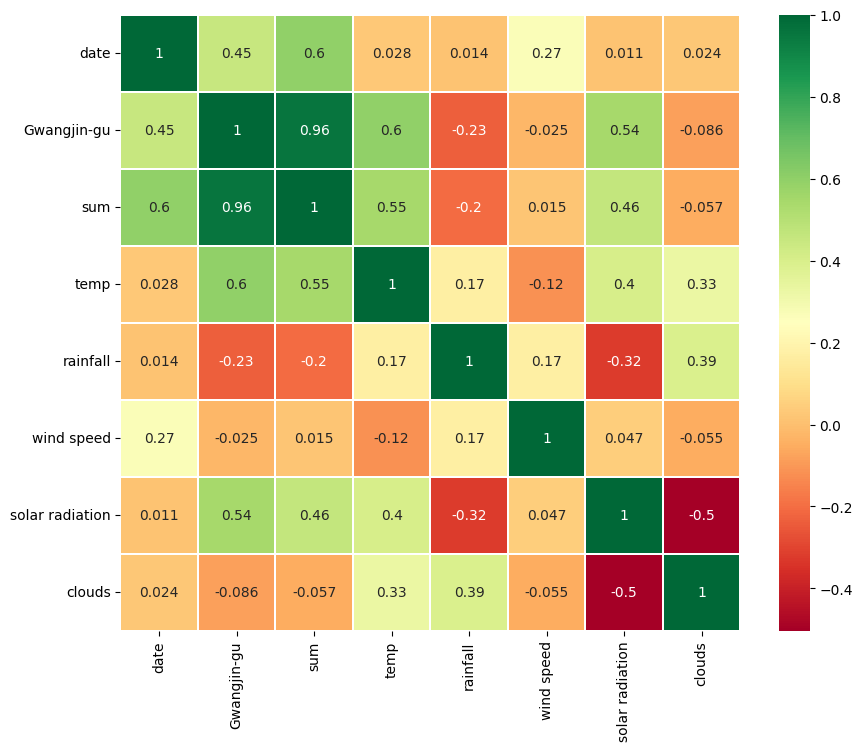

In [20]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [21]:
df = df.drop(['rainfall','clouds','wind speed'],axis = 1)
df.head(5)

,date,Gwangjin-gu,sum,temp,solar radiation
0,20180101,592,4950,-1.3,6.14
1,20180102,840,7136,-1.8,5.36
2,20180103,828,7156,-4.7,6.56
3,20180104,792,7102,-4.7,4.73
4,20180105,818,7705,-3.0,5.96


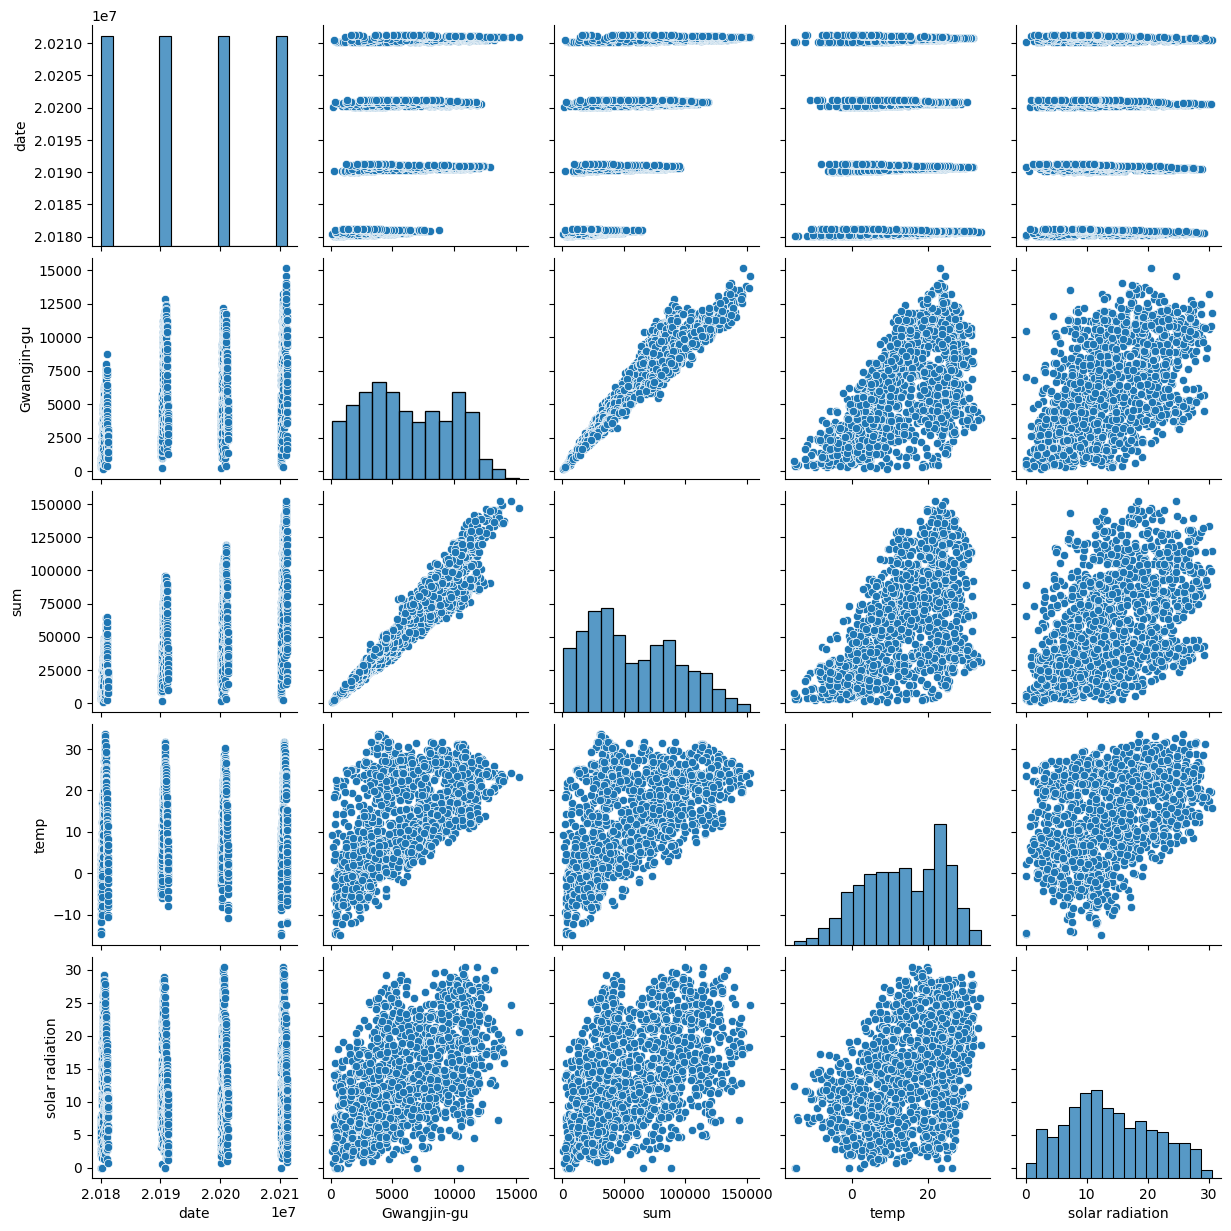

In [22]:
sns.pairplot(data=df)
plt.show()

In [23]:
data = df.drop('Gwangjin-gu', axis=1).values
target = df['Gwangjin-gu'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 7, include_bias=False) #최고 차수를 5제곱까지 특성을 만든다.
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(1095, 329)


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9728275164678027
0.9718057286909544


In [28]:
#표준점수로 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [29]:
#릿지 회귀 규제
from sklearn.linear_model import Ridge
ridge = Ridge()

In [30]:
#최적의 alpha 값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [31]:
alpha_list = [0.01,0.1,1,10,100] #10배씩 늘리기
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

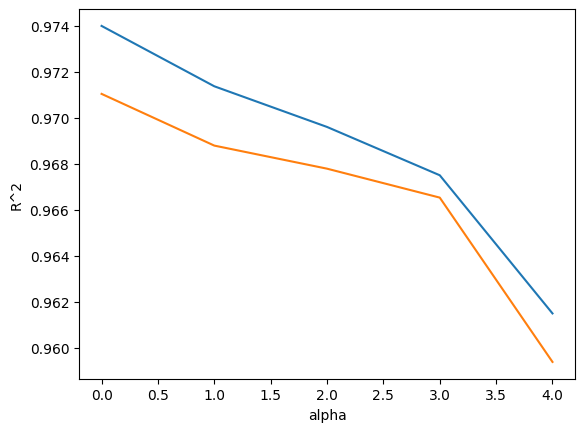

In [32]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [33]:
ridge = Ridge(alpha = 1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9696043496004202
0.9677882957514934


※ Ridge regression : 0.98250618264363

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [35]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10] #10배씩 늘리기
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+08, tolerance: 1.366e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.017e+08, tolerance: 1.366e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

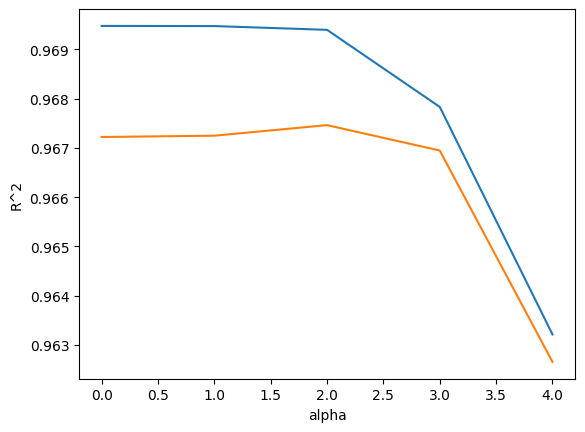

In [36]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [37]:
lasso = Lasso(alpha = 0.001)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9694738311664812
0.9672198354719638


c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+08, tolerance: 1.366e+06
  model = cd_fast.enet_coordinate_descent(


※ Lasso regression : 0.9805374901018553

In [38]:
from sklearn.neighbors import KNeighborsRegressor
train_score = []
test_score = []
n_list = [i for i in range(1,10)]
for i in n_list:
    knr = KNeighborsRegressor(n_neighbors = i)
    knr.fit(X_train, y_train)
    train_score.append(knr.score(X_train, y_train))
    test_score.append(knr.score(X_test, y_test))

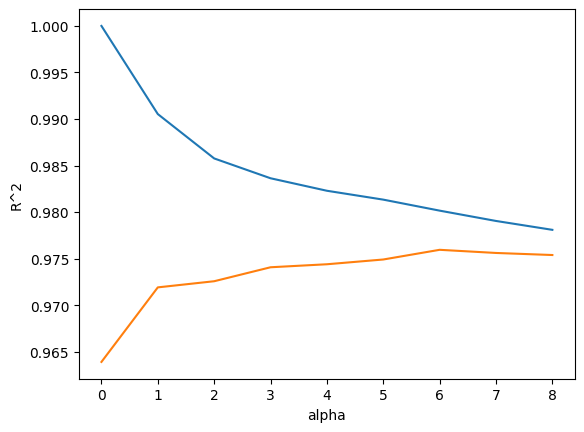

In [39]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [40]:
knr.n_neighbors = 4
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9836346611147762
0.9740737355912509


※ KNeighbors Regressor : 0.9838396089547139

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [42]:
from sklearn.linear_model import SGDRegressor
sg = SGDRegressor(max_iter=100,random_state=1, verbose=1)
sg.fit(train_scaled, y_train)
print(sg.score(train_scaled, y_train))
print(sg.score(test_scaled, y_test))

-- Epoch 1
Norm: 2457.49, NNZs: 4, Bias: 5754.357716, T: 1095, Avg. loss: 3836034.665365
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2679.57, NNZs: 4, Bias: 6148.984424, T: 2190, Avg. loss: 583454.357936
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2860.32, NNZs: 4, Bias: 6224.037036, T: 3285, Avg. loss: 459849.666284
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2990.91, NNZs: 4, Bias: 6230.600556, T: 4380, Avg. loss: 411264.813502
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3127.78, NNZs: 4, Bias: 6241.313629, T: 5475, Avg. loss: 384348.118333
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3204.49, NNZs: 4, Bias: 6242.838467, T: 6570, Avg. loss: 369038.784296
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3259.74, NNZs: 4, Bias: 6236.506876, T: 7665, Avg. loss: 358662.593331
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3321.88, NNZs: 4, Bias: 6235.299052, T: 8760, Avg. loss: 353201.353027
Total training time: 0.00 seconds.
-- Epoch 9
Norm

※ SGD Regressor : 0.9660714090414526

In [43]:
from sklearn.tree import DecisionTreeRegressor 

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [44]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,10))
# plot_tree(dt)
# plt.show()

In [45]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.9798955653068194


※ DecisionTree Regressor : 0.9787531020460464

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [47]:
rfTree= rf.estimators_[0]
plot_tree(rfTree)
plt.show()

NameError: name 'plot_tree' is not defined

In [ ]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9977440434414109
0.9863638589807722


※ RandomForest Regressor : 0.988003439459397